In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio import Phylo
from featureUtils import BED_file_to_features, feature_to_seq
from Bio.Phylo.PhyloXML import Phyloxml
from clustering_to_phylogeny import clustering_to_phylogeny
from phylogeny_to_levels import phylogeny_to_levels
from matrix_utils import load_matrix_from_triu
import sys

In [2]:
references = {seq.id : seq for seq in SeqIO.parse("./data/debug/HSA.FULLchr.fasta", "fasta")}

In [3]:
monomers_as_features = BED_file_to_features("./data/debug/HSA_final_decomposition.bed")

In [4]:
#sample_size = len(monomers_as_features)
#sample_size = 10

In [5]:
#monomers_as_features = monomers_as_features[0:sample_size]

In [6]:
monomers_as_seqs = [feature_to_seq(feature, references) for feature in monomers_as_features]

In [7]:
# dist_matrix = load_matrix_from_triu('data/debug/dist_matrix.npy')
dist_matrix = np.load('data/debug/dist_matrix_complete.npy')

In [8]:
# with open('data/debug/dist_matrix_complete.npy', 'wb') as f:
    # np.save(f, dist_matrix)

In [9]:
#dist_matrix = dist_matrix[0:sample_size,0:sample_size]

In [10]:
curr_recursion_limit = sys.getrecursionlimit()
curr_recursion_limit

3000

In [11]:
if (curr_recursion_limit < len(monomers_as_features)):
    sys.setrecursionlimit(len(monomers_as_features))

In [12]:
clustering_res = clustering_to_phylogeny(dist_matrix=dist_matrix, items_as_seq_features=monomers_as_features)

Initial aggregation with 103784 leaves and 207567 clades
Compacted aggregation with 103784 leaves and 122271 clades
Simple phylogeny with 103784 leaves and 122271 clades


In [13]:
phyloXml = Phyloxml(phylogenies=[clustering_res.phylogeny], attributes=None)
Phylo.write(phyloXml, 'data/phylogeny.xml', format='phyloxml')

1

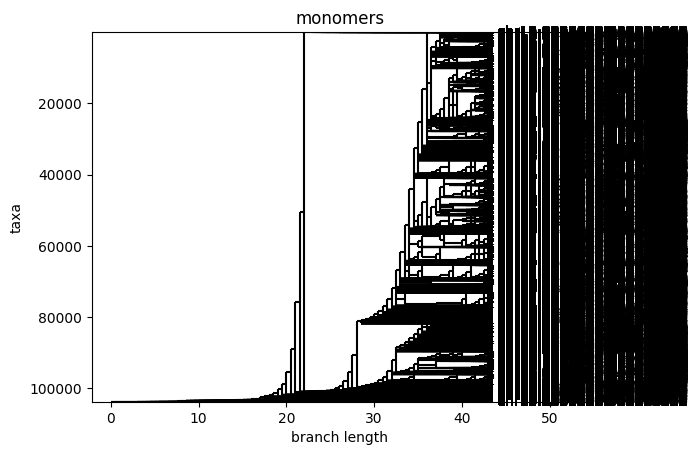

In [14]:
Phylo.draw(clustering_res.phylogeny)